# Final Project Report - DAT650, Blockchain Technology - University of Stavanger - Fall, 2021

* In this project, we invastigate the effects each of the three main constraints have on selfish mining strategy and how profitable it is relativ to honest mining, these constraints are:
    1. The number of selfish miners vs. the number of honest miners. 
    2. The mining power.
    3. The network power.
    
<br />

* To better isolate and observe the effect of mining and network power, we choose to:
    1. Set the network power to be random by picking a random blockchain when blockchain forks appear as a result of selfish mining when simulating/varying the selfish mining power.
    2. SSet the mining power to be equal for each miner in the simulation when simulating/varying the selfish network power.

<br />

* In addition we plan on invastigating how profitable both of the stubborn and GHOST mining strategies are in selfish mining

<br />

* The table below explains the multiple simulations that is carried out in this notebook.

| Number of Simulation | Simulation Goal | Total Number of Miners | Number of Selfish Miners | Number of Honest Miners | Mining Power | Network Power |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Study the effect of an increasing mining power of just one selfish miner. | 100 miners. | 1 selfish. | 99 honest. | 100 units of mining power available, Increasing the mining power of the one selfish miner and decreasing the mining power of the honest miner(s) throughout the simulations. | Random for all miners when blockchain forks appear. |
| 2 | Study the effect of an increasing selfish mining power as a result of increasing the number of selfish miners and decreasing the number of honest miners. | 100 miners. | Increasing the number of selfish miners by 1 and therefore the total selfish mining power at each step throughout the simulation. | Decreasing the number of honest miners by 1 and therefore the total honest mining power at each step throughout the simulation. | 100 units of mining power available, distributed equally among 100 miners where each miner gets 1 unit of power. | Random for all miners when blockchain forks appear. |
| 3 | Study the effect of an increasing network power of just one selfish miner. | 100 miners. | 1 selfish. | 99 honest. | 100 units of mining power available, distributed equally among 100 miners where each miner gets 1 unit of power. | 100 units of network power available, Increasing the network power of the one selfish miner and decreasing the network power of the honest miner(s) throughout the simulations, the higher the network power is, the higher the chances are for a miner to replicate his block across the network. |
| 4 | Study the effect of an increasing selfish network power as a result of increasing the number of selfish miners and decreasing the number of honest miners. | 100 miners. | Increasing the number of selfish miners by 1 and therefore the total selfish network power at each step throughout the simulation. | Decreasing the number of honest miners by 1 and therefore the total honest network power at each step throughout the simulation. | 100 units of mining power available, distributed equally among 100 miners where each miner gets 1 unit of power. | 100 units of network power available, distributed equally among 100 miners where each miner gets 1 unit of power, the higher the network power is, the higher the chances are for a miner to replicate his block across the network. |
| 5 | Study the effect of GHOST mining when increasing the number of selfish miners following the GHOST strategy and decreasing the number of honest miners. | 100 miners. | Increasing the number of GHOST selfish miners by 1 and therefore the total GHOST selfish mining and network power at each step throughout the simulation. | Decreasing the number of honest miners by 1 and therefore the total honest mining and network power at each step throughout the simulation. | 100 units of mining power available, distributed equally among 100 miners where each miner gets 1 unit of power. | 100 units of network power available, distributed equally among 100 miners where each miner gets 1 unit of power, the higher the network power is, the higher the chances are for a miner to replicate his block across the network. |

#### First, we declare and construct classes for Block, Blockchain, Honest Miner and Selfish Miner along with other helping methods in the cell below.

In [1]:
import random
import hashlib as hasher

def hashbits(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    hash_obj.update(inputbytes)
    hashbytes = hash_obj.digest()
    return ''.join(f'{x:08b}' for x in hashbytes)

def numberOfInitZeros(hashStr):
    count = 0
    for i in range (0 , len(hashStr)):
        if hashStr[i] == '1':
            break
        count += 1
    return count

class Block:
    def __init__(self, data, creator=None, previous=None, nonce=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            self.creator = Miner(0 , "0")
            self.height = 0
        else:
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
            self.height = previous.height+1
        self.nonce = nonce
        self.hash = self.hash_block()
        self.children = []

    def hash_block(self):
        return hashbits(self.data+ self.creator.name + self.previous_hash + str(self.nonce))

class Blockchain:
    def __init__(self, genesis_data, difficulty):
        self.chain = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0

    def longestChain(self):
        max = self.chain[0].height
        for block in self.chain:
            if block.height > max:
                max = block.height
        maxes = [block for block in self.chain if block.height == max]
        r = random.choices(maxes, k=1)
        return r[0]
        
    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size +=1

    def checkMiner(self, miner):
        last = self.longestChain()
        count = 0
        while last!=None:
            if last.creator == miner:
                count += 1
            last = last.previous
        return count
            
class Miner:
    def __init__(self, miningPower, name, blockchain=None):
        self.miningPower = miningPower
        self.nonce = random.randint(0,100000)
        self.name = name
        self.blockchain = blockchain
        if self.blockchain != None:
            self.lastBlock = blockchain.longestChain()
  
    def UpdateLast(self):
        latest = self.blockchain.longestChain()
        if latest.height > self.lastBlock.height:
            self.lastBlock = latest
        
    def PoWSolver(self):
        for i in range (0 , self.miningPower):
            newBlock = Block(str(self.blockchain.size), self, self.lastBlock, self.nonce)
            h = newBlock.hash_block()
            count = numberOfInitZeros(h)
            if count >= bc.difficulty:
                self.blockchain.add(newBlock)
                self.lastBlock = newBlock
            self.nonce += 1

class SelfishMiner(Miner):
    def __init__(self, miningPower, name, blockchain=None):
        super().__init__(miningPower, name, blockchain)
        self.privateBlocks = []
        self.publishNext = False

    def UpdateLast(self):
        #add this function
        latest = self.blockchain.longestChain()
        publicheight = latest.height
        if publicheight > self.lastBlock.height:
            self.privateBlocks = []
            self.lastBlock = latest
            self.publishNext = False
        if publicheight == self.lastBlock.height-1 and len(self.privateBlocks)> 1:
            for block in self.privateBlocks:
                self.blockchain.add(block)
                self.privateBlocks = []
        if publicheight == self.lastBlock.height:
            for block in self.privateBlocks:
                self.blockchain.add(block)
                self.privateBlocks = []
                self.publishNext = True

    def PoWSolver(self):
        #add this function - selfish PoW
        for i in range (0 , self.miningPower):
            newBlock = Block(str(self.blockchain.size), self, self.lastBlock, self.nonce)
            h = newBlock.hash_block()
            count = numberOfInitZeros(h)
            if count >= bc.difficulty:
                if self.publishNext:
                    self.blockchain.add(newBlock)
                    self.publishNext = False
                else:
                    self.privateBlocks.append(newBlock)
                self.lastBlock = newBlock
            self.nonce += 1

### We then define a method for running the simulation

In [2]:
"""
A method that runs the simulation of mining

Inputs: 
- The blockchain instance (bc),
- An array of honest miners (honest_miners),
- An array of selfish miners (selfish_miners)

Outputs:
- An array containing the percentage of blocks mined by each honest miner (honest_profits)
- An array containing the percentage of blocks mined by each selfish miner (selfish_profits)
"""
def simulate_selfish_mining(bc, honest_miners, selfish_miners):
    run_to = 101
    while bc.size < run_to:
        for s in selfish_miners:
            s.PoWSolver()

        for m in honest_miners:
            m.PoWSolver()

        for s in selfish_miners:
            s.UpdateLast()

        for m in honest_miners:
            m.UpdateLast()
    
    bc_height = bc.longestChain().height
    
    selfish_profits = []
    for selfish_miner in selfish_miners:
        percentage_of_miner_blocks = bc.checkMiner(selfish_miner) / bc_height
        selfish_profits.append(percentage_of_miner_blocks)
    
    honest_profits = []
    for honest_miner in honest_miners:
        percentage_of_miner_blocks = bc.checkMiner(honest_miner) / bc_height
        honest_profits.append(percentage_of_miner_blocks)
        
    return selfish_profits, honest_profits

### Mining Power Simulation & Analysis<br>
## Simulation nr. 1: 
In this simulation, we aim to study the effect of an increasing mining power of just one selfish miner, the simulation has the following setup:

A) Total available mining power of 100.<br/>
B) starting the total selfish mining power at 0% of the total available mining power, and<br/>
C) starting the total honest mining power at 60% of the total available mining power.<br/>
D) Total number of miners is 100.<br/><br/>
E) Mining power will vary from one miner to another, beacuse we are:<br/>
    1. Increasing the mining power of the 1 selfish miner from 0 to 60 with selfish_mining_power += 1 at each step.<br/>
    2. decreasing the mining power of the 99 honest miners from 60 to 1 with honest_mining_power -= 1 at each step.<br/><br/>
F) Network power is equally random to all miners, so when forks appears between multiple longest blockchains, a random blockchain is picked up.<br/><br/>

Please note that we are only interested in observing a selfish mining power up to 51% as after that it is naturally more profitable to run a 51% attack instead of selfish mining attack. but we are setting the upper simulation limit to 60% to have better view of observation.

In [3]:
"""
This method makes miners of a given type (selfish/honest), and
equally assign mining power to each miner within 
the given limits of mining power and number of miners.

example:
> if we make the following call:
> make_miners(type_of_minors="selfish", num_of_miners=40, total_mining_power=80, blockchain)
> we should get an array of selfish miners, where each miner has 80/40 = 2 mining power

However if we call the same method with
> make_miners(type_of_minors="selfish", num_of_miners=60, total_mining_power=20, blockchain)
> due to the use of round method on calculating the individual mining power, 
    only 20 miners will get a power of 1 and the rest will have no mining power, 
    (i.e. mining power of 0). 
"""
def make_miners(type_of_minors, num_of_miners, total_mining_power, blockchain):
    miners = []
    remaining_mining_power = total_mining_power
    
    while len(miners) < num_of_miners:
        if remaining_mining_power == 0:
            mining_power = 0
        elif len(miners) == num_of_miners-1:
            mining_power = remaining_mining_power
        else:
            mining_power = round(total_mining_power/num_of_miners)
            remaining_mining_power -= mining_power
            
        if type_of_minors == "honest":
            miner = Miner(mining_power, f"Honest miner nr. {len(miners)+1}", blockchain)
        elif type_of_minors == "selfish":
            miner = SelfishMiner(mining_power, f"Selfish miner nr. {len(miners)+1}", blockchain)
        
        miners.append(miner)
        
    return miners

"""
The code below runs simulation nr. 1, see table at the head of this notebook for summary details
"""
output = True # Set this to False to disable update messages from simulations
all_total_selfish_profits = []
all_total_honest_profits = []
sim_range_selfish = range(0, 61, 1)
sim_range_honest = range(61, 0, -1)

for selfish_power in sim_range_selfish:
    num_of_selfish_miners = 1
    num_of_honest_miners = 99
    total_mining_power = 100
    honest_power_share = round((100-selfish_power)/100, 2) 
    selfish_power_share = round(selfish_power/100, 2) 
    
    honest_mining_power = round(total_mining_power * honest_power_share)
    selfish_mining_power = round(total_mining_power * selfish_power_share)
    
    bc = Blockchain("0" , 7)

    honest_miners = make_miners("honest", num_of_honest_miners, honest_mining_power, bc)
    
    selfish_miners = make_miners("selfish", num_of_selfish_miners, selfish_mining_power, bc)
        
    if output:
        print(f"Running simulation of mining power with:")
        print(f"-> {len(honest_miners)} honest minors having {round(honest_power_share*100)}% of total mining power")
        print(f"-> {len(selfish_miners)} selfish minors having {round(selfish_power_share*100)}% of total mining power")
        print("...")
        
    selfish_profits, honest_profits = simulate_selfish_mining(bc, honest_miners, selfish_miners)
    sum_selfish_profit = round(sum(selfish_profits), 2)
    sum_honest_profit = round(sum(honest_profits), 2)
    all_total_selfish_profits.append(sum_selfish_profit*100)
    all_total_honest_profits.append(sum_honest_profit*100)
    
    if output:
        print(f"Total Percentage Sum of Honest Profit: {sum_honest_profit}")
        print(f"Total Percentage Sum of Selfish Profit: {sum_selfish_profit}")
        print(f"Total Percentage Sum of Profit (Honest+Selfish):: {round(sum_selfish_profit+sum_honest_profit)}")
        print()


Running simulation of mining power with:
-> 99 honest minors having 100% of total mining power
-> 1 selfish minors having 0% of total mining power
...
Total Percentage Sum of Honest Profit: 1.01
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 99% of total mining power
-> 1 selfish minors having 1% of total mining power
...
Total Percentage Sum of Honest Profit: 0.98
Total Percentage Sum of Selfish Profit: 0.02
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 98% of total mining power
-> 1 selfish minors having 2% of total mining power
...
Total Percentage Sum of Honest Profit: 0.99
Total Percentage Sum of Selfish Profit: 0.01
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 97% of total mining power
-> 1 selfish minors having 3% 

Total Percentage Sum of Honest Profit: 0.49
Total Percentage Sum of Selfish Profit: 0.49
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 71% of total mining power
-> 1 selfish minors having 29% of total mining power
...
Total Percentage Sum of Honest Profit: 0.7
Total Percentage Sum of Selfish Profit: 0.3
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 70% of total mining power
-> 1 selfish minors having 30% of total mining power
...
Total Percentage Sum of Honest Profit: 0.67
Total Percentage Sum of Selfish Profit: 0.33
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 69% of total mining power
-> 1 selfish minors having 31% of total mining power
...
Total Percentage Sum of Honest Profit: 0.41
Total Percentage Sum of Selfish Profit: 0.59
Total Percentage Sum of Profit (Ho

Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 43% of total mining power
-> 1 selfish minors having 57% of total mining power
...
Total Percentage Sum of Honest Profit: 0.93
Total Percentage Sum of Selfish Profit: 0.07
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 42% of total mining power
-> 1 selfish minors having 58% of total mining power
...
Total Percentage Sum of Honest Profit: 0.89
Total Percentage Sum of Selfish Profit: 0.11
Total Percentage Sum of Profit (Honest+Selfish):: 1

Running simulation of mining power with:
-> 99 honest minors having 41% of total mining power
-> 1 selfish minors having 59% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Hone

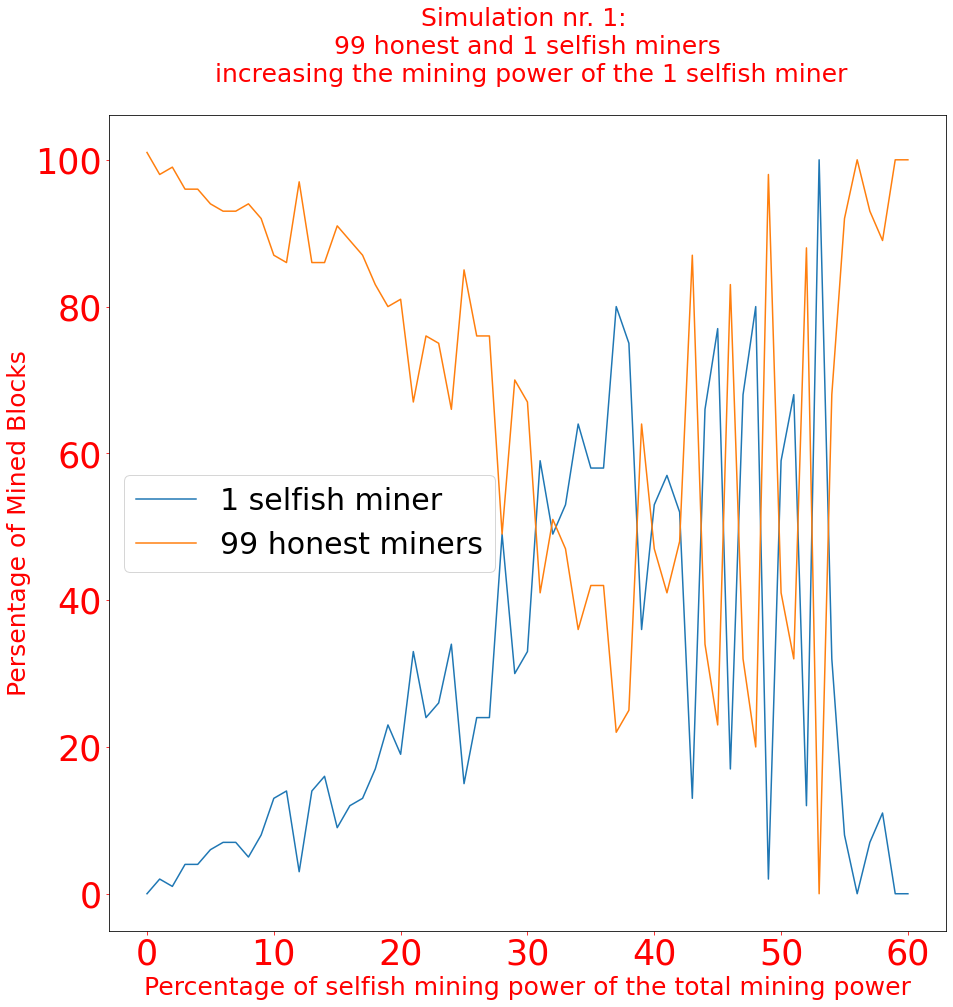

In [4]:
"""
Drawing the results of the previous simulation nr. 1
"""

import matplotlib.pyplot as plt

selfish_power = list(sim_range_selfish)
honest_power = list(sim_range_honest)


fig, axs = plt.subplots(1, 1, figsize=(15,15))

axs.plot(selfish_power, all_total_selfish_profits, label = "1 selfish miner")
axs.plot(selfish_power, all_total_honest_profits, label = "99 honest miners")
axs.tick_params(axis='x', colors='red')
axs.tick_params(axis='y', colors='red')
axs.set_title('Simulation nr. 1: \n 99 honest and 1 selfish miners \n increasing the mining power of the 1 selfish miner\n', fontsize=25).set_color('red')
axs.set_xlabel('Percentage of selfish mining power of the total mining power', fontsize=25).set_color('red')
axs.set_ylabel('Persentage of Mined Blocks', fontsize=25).set_color('red')
axs.legend(prop={"size":30})
l = plt.setp(axs.get_xticklabels(), fontsize=35)
l = plt.setp(axs.get_yticklabels(), fontsize=35)


## Analysis and Comments on Simulation Results nr. 1
When we have 1 selfish miner and 99 honest miners, we observe the following:

1. Selfish mining is more likely to be less profitable than honest mining as long as the one selfish miner has a mining power under 25% of the total mining power, but profit of selfish mining is increasing with the increased mining power of the selfish miner.<br><br>
2. However, when the selfish mining power is more than 25% of the total mining power, there exist a big competition between both types of miners.<br><br>
3. But does that mean selfish mining is a good strategy?
* The one Selfish miner was able to climb from 0% to 40% of total profit for a mining power less than 25%, perhaps it is a good strategy as long as the selfish miner is having a mining power closer to 25% of the total mining power.

### Mining Power Analysis and Simulation<br>
## Simulation nr. 2: 

In this simulation we aim to study the effect of an increasing number of selfish miners where all individual honest and selfish miners have equal mining power, but where the number of selfish miners increases by 1, and at the same time the number of honest miners decreases by 1 at the same time. This simulation has the following setup:

A) Total available mining power of 100

B) starting the total selfish mining power at 0

C) starting the total honest mining power at 100

D) Total number of miners is 100

E) Each miner will have the same mining power as other miners, beacuse we are
1. Increasing the selfish mining power from 0 to 60 with selfish_mining_power += 1, and 
    at the same time increasing the number of selfish miners from 0 to 60 with 
    num_selfish_miners += 1
2. Decreasing the honest mining power from 100 to 40 with honest_mining_power -= 1, and 
    at the same time decreasing the number of honest miners from 100 to 40 with 
    num_honest_miners -= 1
    
F) Network power is equally random to all miners, so when forks appears between multiple longest blockchains, a random blockchain is picked up.

In [5]:
"""
This method makes miners of a given type of miners (selfish/honest), and
equally assign mining power to each miner within 
the given limits of mining power and number of miners

example:
> if we make the following call:
> make_miners(type_of_minors="selfish", num_of_miners=40, total_mining_power=80)
> we should get an array of selfish miners, where each miner has 80/40 = 2 mining power

However if we call the same method with
> make_miners(type_of_minors="honest", num_of_miners=60, total_mining_power=20)
> due to the use of round method on calculating the individual mining power, 
    only 20 miners will get a power of 1 and the rest will have no mining power, 
    i.e. mining power of 0. 
"""
def make_miners(type_of_minors, num_of_miners, total_mining_power):
    miners = []
    remaining_mining_power = total_mining_power
    
    while remaining_mining_power > 0:
        if len(miners) == num_of_miners-1:
            mining_power = remaining_mining_power
        else:
            mining_power = round(total_mining_power/num_of_miners)
        
        if type_of_minors == "honest":
            miner = Miner(mining_power, f"Honest miner nr. {len(miners)+1}", bc)
        elif type_of_minors == "selfish":
            miner = SelfishMiner(mining_power, f"Selfish miner nr. {len(miners)+1}", bc)
        
        miners.append(miner)
        remaining_mining_power -= mining_power
        
    return miners

"""
The code below runs simulation nr. 2, se table at the head of this notebook for summary details
"""
output = True # Set this to False to disable update messages from simulations
all_total_selfish_profits = []
all_total_honest_profits = []
all_average_selfish_profits = []
all_average_honest_profits = []
sim_range_selfish = range(0, 61, 1)
sim_range_honest = range(61, 0, -1)

for selfish_power in sim_range_selfish:
    total_mining_power = 100
    num_of_selfish_miners = selfish_power
    num_of_honest_miners = total_mining_power-selfish_power
    honest_power_share = round(num_of_honest_miners/100, 2)
    selfish_power_share = round(num_of_selfish_miners/100, 2)
    
    honest_mining_power = round(total_mining_power * honest_power_share)
    selfish_mining_power = round(total_mining_power * selfish_power_share)

    bc = Blockchain("0" , 7)
    
    honest_miners = make_miners("honest", num_of_honest_miners, honest_mining_power)
    
    selfish_miners = make_miners("selfish", num_of_selfish_miners, selfish_mining_power)
        
    if output:
        print(f"Running simulation of mining power with:")
        print(f"-> {len(honest_miners)} honest miners having {round(honest_power_share*100)}% of total mining power")
        print(f"-> {len(selfish_miners)} selfish miners having {round(selfish_power_share*100)}% of total mining power")
        print("...")
    
    selfish_profits, honest_profits = simulate_selfish_mining(bc, honest_miners, selfish_miners)
    sum_selfish_profit = round(sum(selfish_profits), 2)
    sum_honest_profit = round(sum(honest_profits), 2)
    all_total_selfish_profits.append(sum_selfish_profit*100)
    all_total_honest_profits.append(sum_honest_profit*100)
    
    if len(selfish_profits) != 0:
        average_selfish_profit = round(sum(selfish_profits) / len(selfish_profits), 2)
    else:
        average_selfish_profit = 0
    all_average_selfish_profits.append(average_selfish_profit*100)  
    
    if len(honest_profits) != 0:
        average_honest_profit = round(sum(honest_profits) / len(honest_profits), 2)
    else:
        average_honest_profit = 0
    all_average_honest_profits.append(average_honest_profit*100)
    
    if output:
        print(f"Total Percentage Sum of Honest Profit: {sum_honest_profit}, Average: {average_honest_profit}")
        print(f"Total Percentage Sum of Selfish Profit: {sum_selfish_profit}, Average: {average_selfish_profit}")
        print(f"Total Percentage Sum of Profit (Honest+Selfish): {round(sum_selfish_profit+sum_honest_profit)}")
        print()

Running simulation of mining power with:
-> 100 honest miners having 100% of total mining power
-> 0 selfish miners having 0% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0, Average: 0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 99 honest miners having 99% of total mining power
-> 1 selfish miners having 1% of total mining power
...
Total Percentage Sum of Honest Profit: 0.99, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 98 honest miners having 98% of total mining power
-> 2 selfish miners having 2% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 97 

Total Percentage Sum of Honest Profit: 0.84, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.18, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 73 honest miners having 73% of total mining power
-> 27 selfish miners having 27% of total mining power
...
Total Percentage Sum of Honest Profit: 0.83, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.17, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 72 honest miners having 72% of total mining power
-> 28 selfish miners having 28% of total mining power
...
Total Percentage Sum of Honest Profit: 0.78, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.24, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 71 honest miners having 71% of total mining power
-> 29 selfish miners having 29% of total mining power
...
Total Percentage Sum of Honest 

Total Percentage Sum of Honest Profit: 0.72, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.33, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 47 honest miners having 47% of total mining power
-> 53 selfish miners having 53% of total mining power
...
Total Percentage Sum of Honest Profit: 0.67, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.3, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 46 honest miners having 46% of total mining power
-> 54 selfish miners having 54% of total mining power
...
Total Percentage Sum of Honest Profit: 0.61, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.39, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of mining power with:
-> 45 honest miners having 45% of total mining power
-> 55 selfish miners having 55% of total mining power
...
Total Percentage Sum of Honest P

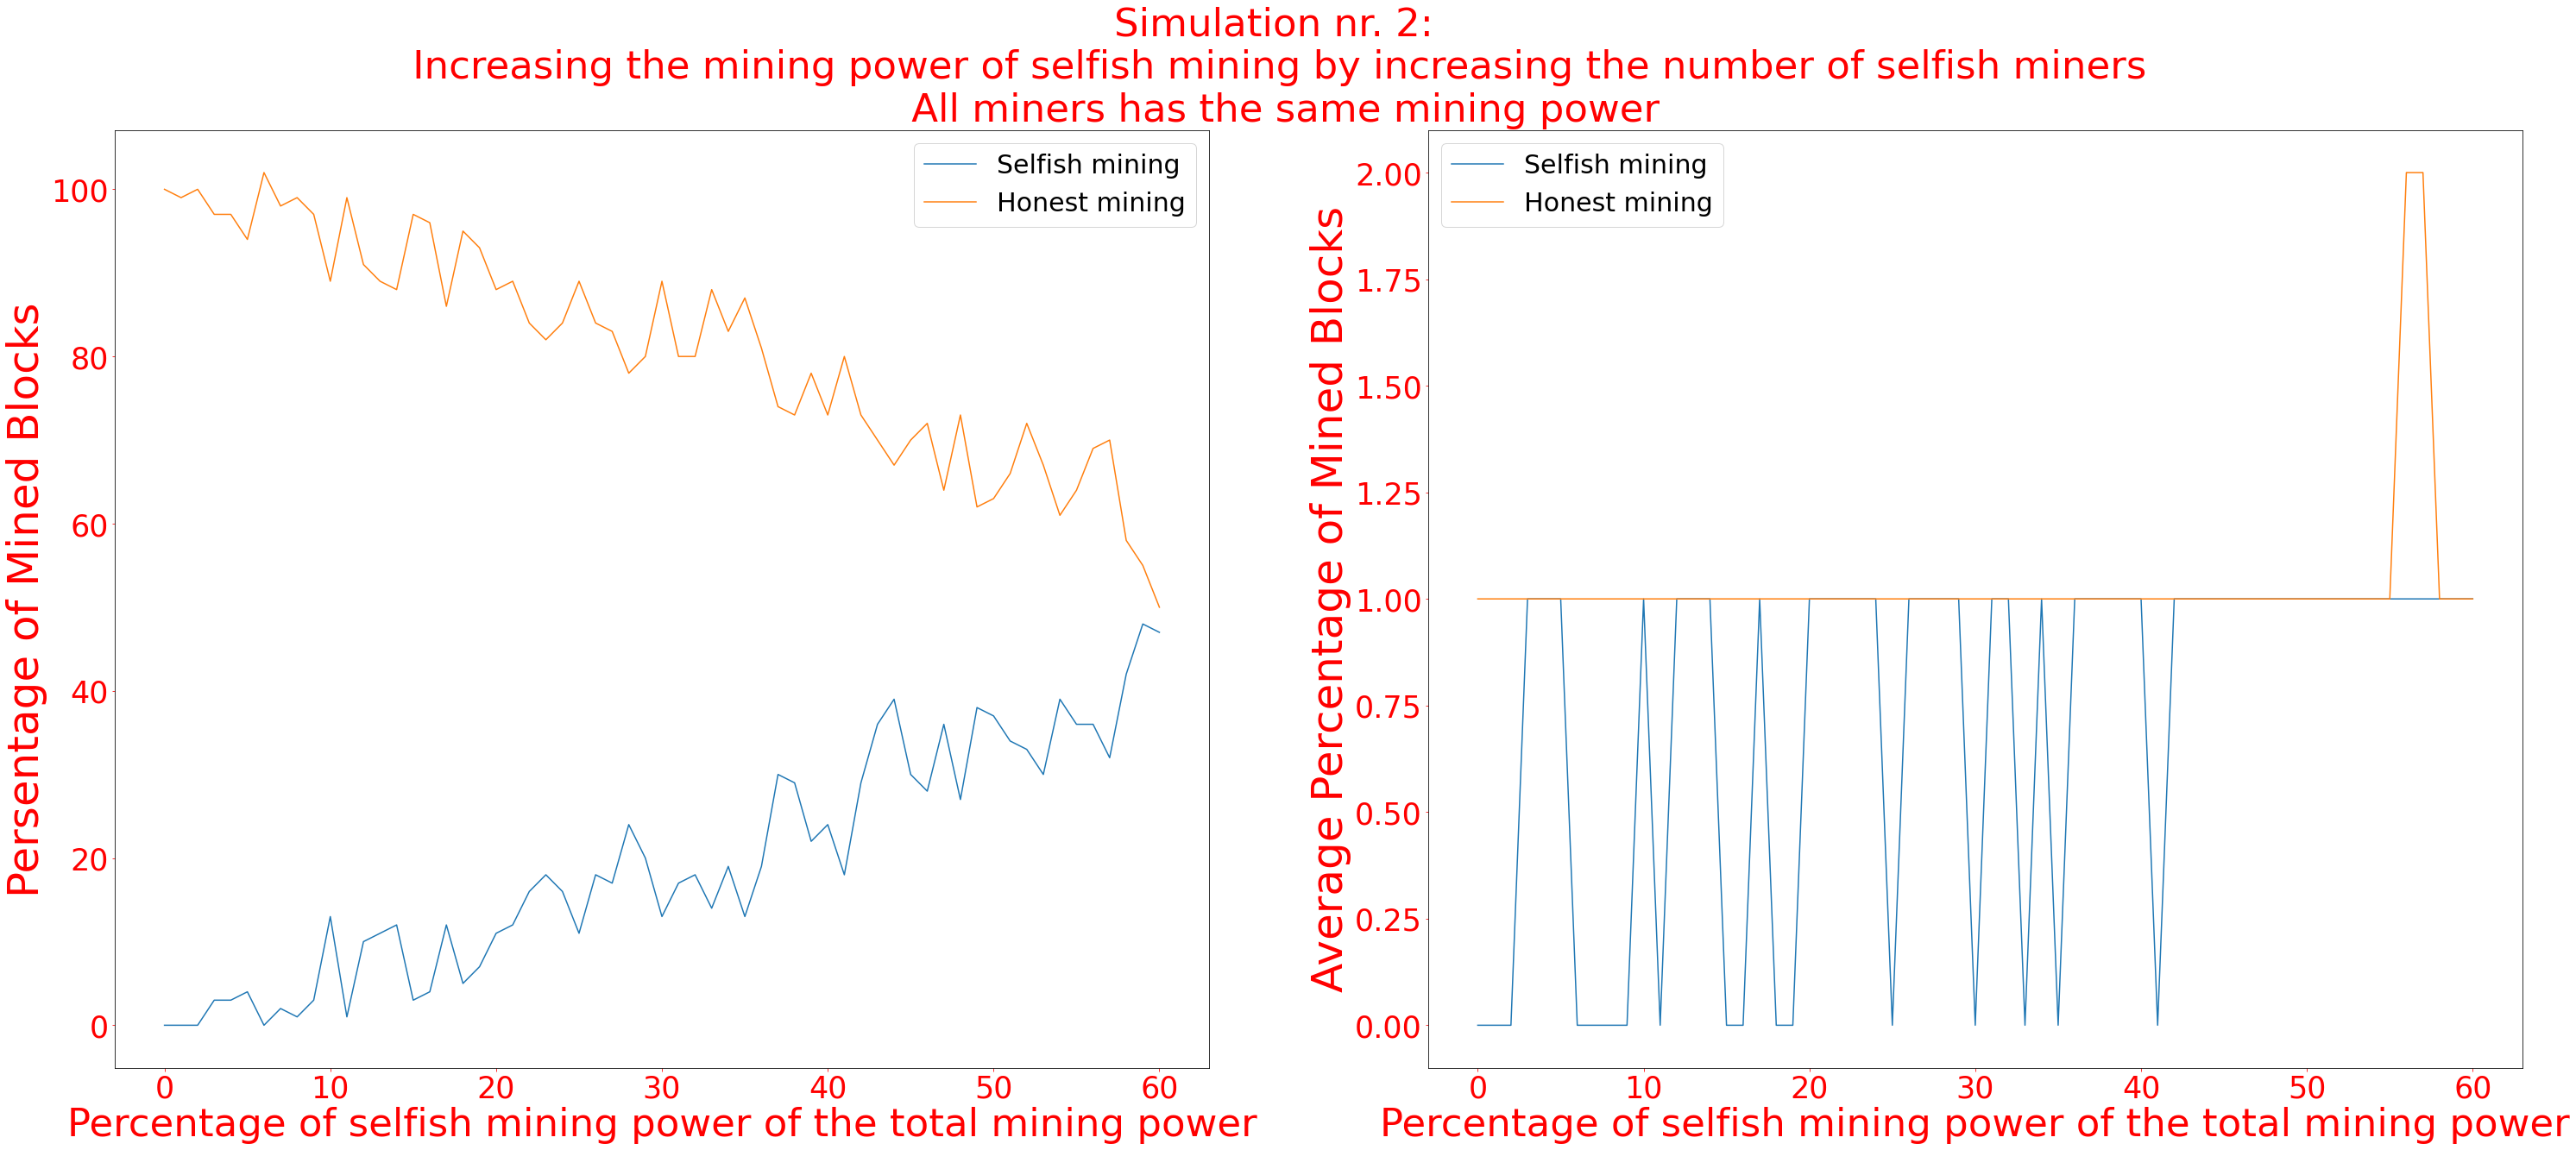

In [6]:
"""
Drawing the results of the previous simulation nr. 2
"""

import matplotlib.pyplot as plt

selfish_power = list(sim_range_selfish)
honest_power = list(sim_range_honest)

fig, axs = plt.subplots(1, 2, figsize=(50,20))
fig.suptitle('Simulation nr. 2: \n Increasing the mining power of selfish mining by increasing the number of selfish miners \n All miners has the same mining power\n', fontsize=45).set_color('red')  

axs[0].plot(selfish_power, all_total_selfish_profits, label = "Selfish mining")
axs[0].plot(selfish_power, all_total_honest_profits, label = "Honest mining")
axs[0].tick_params(axis='x', colors='red')
axs[0].tick_params(axis='y', colors='red')
axs[0].set_xlabel('Percentage of selfish mining power of the total mining power', fontsize=45).set_color('red')
axs[0].set_ylabel('Persentage of Mined Blocks', fontsize=50).set_color('red')
axs[0].legend(prop={"size":30})
l = plt.setp(axs[0].get_xticklabels(), fontsize=35)
l = plt.setp(axs[0].get_yticklabels(), fontsize=35)

axs[1].plot(selfish_power, all_average_selfish_profits, label = "Selfish mining")
axs[1].plot(selfish_power, all_average_honest_profits, label = "Honest mining")
axs[1].tick_params(axis='x', colors='red')
axs[1].tick_params(axis='y', colors='red')
axs[1].set_xlabel('Percentage of selfish mining power of the total mining power', fontsize=45).set_color('red')
axs[1].set_ylabel('Average Percentage of Mined Blocks', fontsize=50).set_color('red')
axs[1].legend(prop={"size":30})
l = plt.setp(axs[1].get_xticklabels(), fontsize=35)
l = plt.setp(axs[1].get_yticklabels(), fontsize=35)

## Analysis and Comments on Simulation Results nr. 2
When we inrease the selfish mining power by inreasing the number of selfish miners and decreasing the number of honest miners, we observe the following:

1. Selfish mining is less profitable than honest mining under 50% selfish mining power.<br><br>
2. However, the profit inreases with increased number of selfish miners, and the same happens for honest miners as well but in the opposite direction because of the decrease in the number of honest miners.<br><br>
3. The average plot on the right side above, shows that the average profit between honest miners does most of the time equals 1% of the total profit, and the average profit between selfish miners fluctuates mostly between 0 and 1% for a selfish mining power under 60% with one repeated exception at 5% selfish mining power where the average profit of a selfish miner is 2%.
The average profit between honest miners shows a good/fair distribution of profit among honest miners, and instability between selfish miners, that indicates an unfair distribution of profit among selfish miners.

### Network Power Simulation & Analysis <br>

#### The following redesign steps was added to the previous core classes to implement network power

A) Redesigning the longestChain() method in the Blockchain class to simulate network power.

B) Adding an additional attribute to define the network power of a certain miner in the Miner and SelfishMiner classes.

C) Editing the Block class to implement the changes in B)above.

In [7]:
class Block:
    def __init__(self, data, creator=None, previous=None, nonce=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            if creator != None:
                self.creator = Miner(0 , creator.networkingPower, creator.miner_type ,"0")
            else:
                self.creator = Miner(0 , None, None, "0")
            self.height = 0
        else:
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
            self.height = previous.height+1
        self.nonce = nonce
        self.hash = self.hash_block()
        self.children = []

    def hash_block(self):
        return hashbits(self.data+ self.creator.name + self.previous_hash + str(self.nonce))


class Blockchain:
    def __init__(self, genesis_data, difficulty):
        self.chain = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0

    def longestChain(self):
        max = self.chain[0].height
        for block in self.chain:
            if block.height > max:
                max = block.height
        maxes = [block for block in self.chain if block.height == max]
        
        new_maxes = []
        if len(maxes) > 1:
            chances = list(range(1, 101, 1))
            choice = random.choice(chances)
            for block in maxes:
                creator_networking_power = block.creator.networkingPower
                if choice <= creator_networking_power:
                    new_maxes.append(block)
        else:
            new_maxes = maxes
            
        if len(new_maxes) == 0:
            new_maxes = maxes
        return new_maxes[0]
        
    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size +=1

    def checkMiner(self, miner):
        last = self.longestChain()
        count = 0
        while last!=None:
            if last.creator == miner:
                count += 1
            last = last.previous
        return count
            
class Miner:
    def __init__(self, miningPower, networkingPower, miner_type, name, blockchain=None):
        self.miningPower = miningPower
        self.networkingPower = networkingPower
        self.miner_type = miner_type
        self.nonce = random.randint(0,100000)
        self.name = name
        self.blockchain = blockchain
        if self.blockchain != None:
            self.lastBlock = blockchain.longestChain()
  
    def UpdateLast(self):
        latest = self.blockchain.longestChain()
        if latest.height > self.lastBlock.height:
            self.lastBlock = latest
        
    def PoWSolver(self):
        for i in range (0 , self.miningPower):
            newBlock = Block(str(self.blockchain.size), self, self.lastBlock, self.nonce)
            h = newBlock.hash_block()
            count = numberOfInitZeros(h)
            if count >= bc.difficulty:
                self.blockchain.add(newBlock)
                self.lastBlock = newBlock
            self.nonce += 1

class SelfishMiner(Miner):
    def __init__(self, miningPower, networkingPower, miner_type, name, blockchain=None):
        super().__init__(miningPower, networkingPower, miner_type, name, blockchain)
        self.privateBlocks = []
        self.publishNext = False

    def UpdateLast(self):
        latest = self.blockchain.longestChain()
        publicheight = latest.height
        if publicheight > self.lastBlock.height:
            self.privateBlocks = []
            self.lastBlock = latest
            self.publishNext = False
        if publicheight == self.lastBlock.height-1 and len(self.privateBlocks)> 1:
            for block in self.privateBlocks:
                self.blockchain.add(block)
                self.privateBlocks = []
        if publicheight == self.lastBlock.height:
            for block in self.privateBlocks:
                self.blockchain.add(block)
                self.privateBlocks = []
                self.publishNext = True

    def PoWSolver(self):
        for i in range (0 , self.miningPower):
            newBlock = Block(str(self.blockchain.size), self, self.lastBlock, self.nonce)
            h = newBlock.hash_block()
            count = numberOfInitZeros(h)
            if count >= bc.difficulty:
                if self.publishNext:
                    self.blockchain.add(newBlock)
                    self.publishNext = False
                else:
                    self.privateBlocks.append(newBlock)
                self.lastBlock = newBlock
            self.nonce += 1

### Network Power Analysis and Simulation
## Simulation nr. 3: 
In this simulation, we aim to study the effect of an increasing network power of just one selfish miner against 99 honest miners, the simulation has the following setup:

Network Power will be used in the longestChain() method to increase the chances of a certain block creator to have his block and its previous blockchain replicated faster than other the blocks from other miners with low network power, this simulation method is also known as weighted random.

Please note that the block is still chossen randomly in the longestChain() method. However, now we are increasing the chances by checking the network power of the miner who created that block and if it is found out to be smaller than a randomly generated number between 0 to 100 than his block gets replicated and if not, his block does not get replicated across the network in the simulation. <br>

A) Total available network power of 100.<br>

B) starting the total selfish network power at 0, and starting the total honest network power at 100.<br>

C) Total number of miners is 100, always having 99 honest miners and 1 selfish miner.<br>

D) Network power will vary from one miner to another, beacuse we are <br>
    1. Increasing the network power of the 1 selfish miner from 0 to 99 with selfish_network_power += 1, and <br>
    2. Decreasing the network power of the 99 honest miners from 100 to 1 with honest_network_power -= 1.

E) Total mining power is 100 and it is divided equally among all miners, so each miner of the 100 miners will have a mining power of 1 no matter if he is a selfish or honest miner. This is done to isolate the effect of network power from the effect of mining power in the mining results.

In [8]:
"""
This method makes miners of a given type (selfish/honest), and
divides the mining power share equally on the generated miners

example:
> if we make the following call:
> make_miners(type_of_minors="selfish", total_network_power=40, num_of_miners=40, total_mining_power=80)
> we should get an array of 40 selfish miners, where each miner has
> 80/40 = 2 mining power, and 40/40 = 1 network power

However if we call the same method with
> make_miners(type_of_minors="honest", total_network_power=40, num_of_miners=60, total_mining_power=40)
> we should get an array of 40 honest miners, where each miner has
> 40/40 = 1 mining power, and
> 40 of these honest miners has a network power of 1 and
> 20 has a network power of 0 (i.e. they are inactive or offline on the network)
"""
def make_miners(type_of_minors, total_network_power, num_of_miners, total_mining_power, blockchain):
    miners = []
    remaining_mining_power = total_mining_power
    remaining_network_power = total_network_power
    
    while len(miners) < num_of_miners:
        if len(miners) == num_of_miners-1:
            mining_power = remaining_mining_power
            network_power = remaining_network_power
        else:
            mining_power = round(total_mining_power/num_of_miners)
            if remaining_mining_power < 0:
                mining_power = 0
            else:
                mining_power = 1
            remaining_mining_power -= mining_power
                
            network_power = round(total_network_power/num_of_miners)
            if remaining_network_power <= 0:
                network_power = 0
            else:
                network_power = 1
            remaining_network_power -= network_power
        
        if type_of_minors == "honest":
            miner = Miner(mining_power, network_power, "Honest", f"Honest miner nr. {len(miners)+1}", blockchain)
        elif type_of_minors == "selfish":
            miner = SelfishMiner(mining_power, network_power, "Selfish", f"Selfish miner nr. {len(miners)+1}", blockchain)
        
        miners.append(miner)
        
    return miners

"""
The code below runs simulation nr. 3, se table at the head of this notebook for summary details
"""
output = True
all_total_selfish_profits = []
all_total_honest_profits = []
sim_range_selfish = range(0, 100, 1)
sim_range_honest = range(100, 0, -1)

for selfish_network_power in sim_range_selfish:
    num_of_selfish_miners = 1
    num_of_honest_miners = 99
    
    total_mining_power = 100
    honest_power_share = round(num_of_honest_miners/100, 2)
    selfish_power_share = round(num_of_selfish_miners/100, 2)
    honest_mining_power = round(total_mining_power * honest_power_share)
    selfish_mining_power = round(total_mining_power * selfish_power_share)
    
    selfish_networking_power = selfish_network_power
    honest_networking_power = 100-selfish_network_power
    
    bc = Blockchain("0" , 7)
    
    honest_miners = make_miners("honest", honest_networking_power, num_of_honest_miners, honest_mining_power, bc)
    
    selfish_miners = make_miners("selfish", selfish_networking_power, num_of_selfish_miners, selfish_mining_power, bc)
    
    if output:
        print(f"Running simulation of networking power with:")
        print(f"-> {len(honest_miners)} honest miners having {honest_networking_power}% of total networking power")
        print(f"-> {len(selfish_miners)} selfish miners having {selfish_networking_power}% of total networking power")
        print("...")
        
    selfish_profits, honest_profits = simulate_selfish_mining(bc, honest_miners, selfish_miners)
    sum_selfish_profit = round(sum(selfish_profits), 2)
    sum_honest_profit = round(sum(honest_profits), 2)
    all_total_selfish_profits.append(sum_selfish_profit*100)
    all_total_honest_profits.append(sum_honest_profit*100)
    
    if output:
        print(f"Total Percentage Sum of Honest Profit: {sum_honest_profit}")
        print(f"Total Percentage Sum of Selfish Profit: {sum_selfish_profit}")
        print(f"Total Percentage Sum of Profit (Honest+Selfish): {round(sum_selfish_profit+sum_honest_profit)}")
        print()
    


Running simulation of networking power with:
-> 99 honest miners having 100% of total networking power
-> 1 selfish miners having 0% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 99% of total networking power
-> 1 selfish miners having 1% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 98% of total networking power
-> 1 selfish miners having 2% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 97% of total networking 

Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 72% of total networking power
-> 1 selfish miners having 28% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 71% of total networking power
-> 1 selfish miners having 29% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 70% of total networking power
-> 1 selfish miners having 30% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total P

Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 44% of total networking power
-> 1 selfish miners having 56% of total networking power
...
Total Percentage Sum of Honest Profit: 0.99
Total Percentage Sum of Selfish Profit: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 43% of total networking power
-> 1 selfish miners having 57% of total networking power
...
Total Percentage Sum of Honest Profit: 0.97
Total Percentage Sum of Selfish Profit: 0.03
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 42% of total networking power
-> 1 selfish miners having 58% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Tot

Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 16% of total networking power
-> 1 selfish miners having 84% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 15% of total networking power
-> 1 selfish miners having 85% of total networking power
...
Total Percentage Sum of Honest Profit: 0.97
Total Percentage Sum of Selfish Profit: 0.03
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation of networking power with:
-> 99 honest miners having 14% of total networking power
-> 1 selfish miners having 86% of total networking power
...
Total Percentage Sum of Honest Profit: 1.0
Total Percentage Sum of Selfish Profit: 0.0
Total

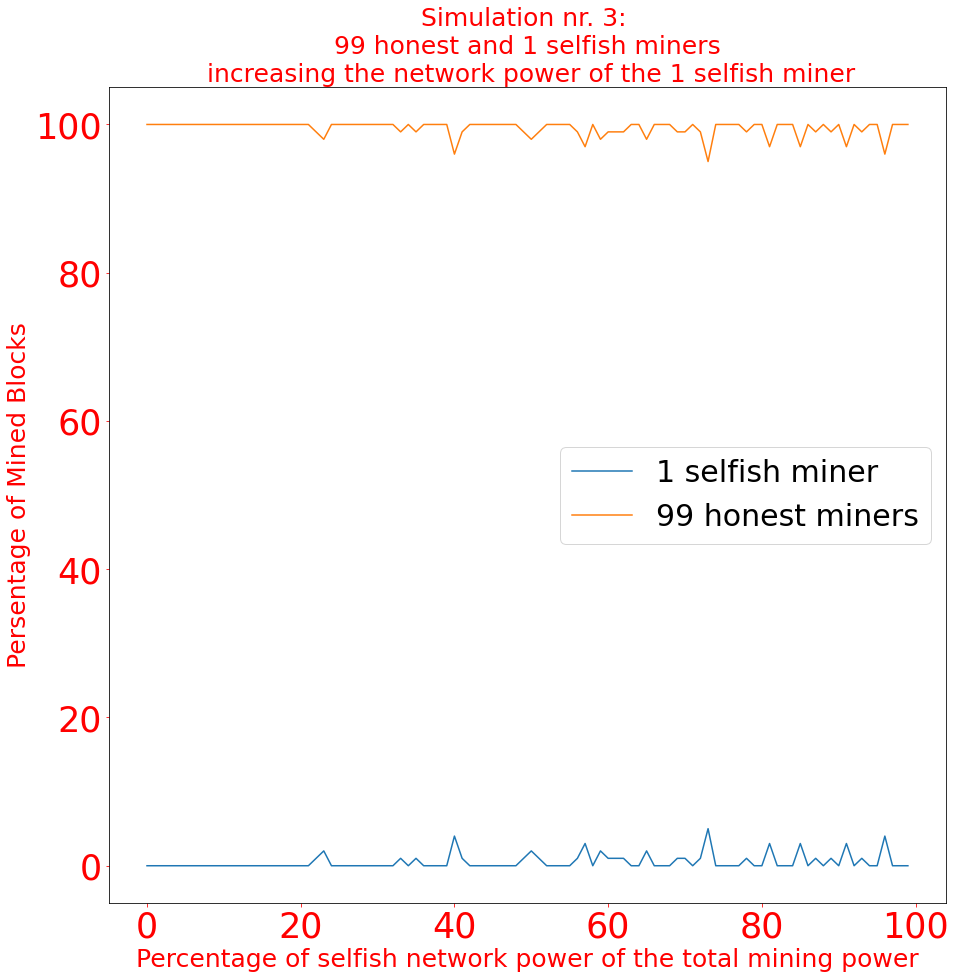

In [9]:
"""
Drawing the results of the previous simulation nr. 3
"""

import matplotlib.pyplot as plt

selfish_power = list(sim_range_selfish)
honest_power = list(sim_range_honest)

fig, axs = plt.subplots(1, 1, figsize=(15,15))

axs.plot(selfish_power, all_total_selfish_profits, label = "1 selfish miner")
axs.plot(selfish_power, all_total_honest_profits, label = "99 honest miners")
axs.tick_params(axis='x', colors='red')
axs.tick_params(axis='y', colors='red')
axs.set_title('Simulation nr. 3: \n 99 honest and 1 selfish miners \n increasing the network power of the 1 selfish miner', fontsize=25).set_color('red')
axs.set_xlabel('Percentage of selfish network power of the total mining power', fontsize=25).set_color('red')
axs.set_ylabel('Persentage of Mined Blocks', fontsize=25).set_color('red')
axs.legend(prop={"size":30})
l = plt.setp(axs.get_xticklabels(), fontsize=35)
l = plt.setp(axs.get_yticklabels(), fontsize=35)

## Analysis and Comments on Simulation Results nr. 3
When we increase the network power of just one selfish miner and decrease the total network power of the other 99 honest miners. We observe the follwing:

1. The maximum achieved profit percentage of the one selfish miner is almost under 5% of total profit, no matter how big of a network power the selfish miner has.
2. However, it is possible to notice a small increase in profit when the 1 selfish miner owns more than 80% of the total network power, but this is still not realistic as it is hard for jsut miner to own such large hold on network power and the gained profit is still under 5%.
3. When it comes to network power: 
* Honest mining is a good strategy for a group of honest miners, and miners with low network power.
* Selfish mining is a good strategy for a lonely miner with high network power.

### Network Power Analysis and Simulation
## Simulation nr. 4: 
In this simulation we aim to study the effect of an increasing number of selfish miners where all individual honest and selfish miners have equal network and mining power. This simulation has the following setup:

A) Total available mining power of 100

B) starting the total selfish network power at 0

C) starting the total honest network power at 100

D) Total number of miners is 100

E) Each miner will have the same network power as other miners, beacuse we are
1. Increasing the selfish network power from 0 to 99 with selfish_network_power += 1, and at the same time increasing the number of selfish miners from 0 to 99 with num_selfish_miners += 1
2. Decreasing the honest network power from 100 to 1 with honest_network_power += 1, and at the same time decreasing the number of honest miners from 100 to 1 with num_honest_miners += 1

F) Mining power is equally divided among to all miners, each miner having a mining power of 1.

In [10]:
"""
The code below runs simulation nr. 4, se table at the head of this notebook for summary details
"""
output = True
all_total_selfish_profits = []
all_total_honest_profits = []
all_average_selfish_profits = []
all_average_honest_profits = []
sim_range_selfish = range(0, 100, 1)
sim_range_honest = range(100, 0, -1)

print("Simulating varying network power between miners with")
print("-> equal mining power for each miner")
print("-> and varying the number of honest and selfish miners at each simulation")
print("")

for i in sim_range_selfish:
    num_of_selfish_miners = i
    num_of_honest_miners = 100-i
    
    total_mining_power = 100
    honest_mining_power_share = round(num_of_honest_miners/total_mining_power, 2)
    selfish_mining_power_share = round(num_of_selfish_miners/total_mining_power, 2)
    honest_mining_power = round(total_mining_power * honest_mining_power_share)
    selfish_mining_power = round(total_mining_power * selfish_mining_power_share)
    
    total_network_power = 100
    honest_network_power_share = round(num_of_honest_miners/total_network_power, 2)
    selfish_network_power_share = round(num_of_selfish_miners/total_network_power, 2)
    honest_network_power = round(total_network_power * honest_network_power_share)
    selfish_network_power = round(total_network_power * selfish_network_power_share)

    bc = Blockchain("0" , 7)
    
    honest_miners = make_miners("honest", honest_network_power, num_of_honest_miners, honest_mining_power, bc)
    
    selfish_miners = make_miners("selfish", selfish_network_power, num_of_selfish_miners, selfish_mining_power, bc)
        
    if output:
        print(f"Running simulation with:")
        print(f"-> {len(honest_miners)} honest minors having {honest_network_power}% of total networking power and {honest_mining_power}% of total mining power")
        print(f"-> {len(selfish_miners)} selfish minors having {selfish_network_power}% of total networking power and {selfish_mining_power}% of total mining power")
        print("...")
        
    selfish_profits, honest_profits = simulate_selfish_mining(bc, honest_miners, selfish_miners)
    sum_selfish_profit = round(sum(selfish_profits), 2)
    sum_honest_profit = round(sum(honest_profits), 2)
    all_total_selfish_profits.append(sum_selfish_profit*100)
    all_total_honest_profits.append(sum_honest_profit*100)
    
    if len(selfish_profits) != 0:
        average_selfish_profit = round(sum(selfish_profits) / len(selfish_profits), 2)
    else:
        average_selfish_profit = 0
    all_average_selfish_profits.append(average_selfish_profit*100)  
    
    if len(honest_profits) != 0:
        average_honest_profit = round(sum(honest_profits) / len(honest_profits), 2)
    else:
        average_honest_profit = 0
    all_average_honest_profits.append(average_honest_profit*100)
    
    if output:
        print(f"Total Percentage Sum of Honest Profit: {sum_honest_profit}, Average: {average_honest_profit}")
        print(f"Total Percentage Sum of Selfish Profit: {sum_selfish_profit}, Average: {average_selfish_profit}")
        print(f"Total Percentage Sum of Profit (Honest+Selfish): {round(sum_selfish_profit+sum_honest_profit)}")
        print()

Simulating varying network power between miners with
-> equal mining power for each miner
-> and varying the number of honest and selfish miners at each simulation

Running simulation with:
-> 100 honest minors having 100% of total networking power and 100% of total mining power
-> 0 selfish minors having 0% of total networking power and 0% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0, Average: 0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 99 honest minors having 99% of total networking power and 99% of total mining power
-> 1 selfish minors having 1% of total networking power and 1% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 98 honest minors having 98% of total networking power and 98% of total

Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 77 honest minors having 77% of total networking power and 77% of total mining power
-> 23 selfish minors having 23% of total networking power and 23% of total mining power
...
Total Percentage Sum of Honest Profit: 0.97, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.03, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 76 honest minors having 76% of total networking power and 76% of total mining power
-> 24 selfish minors having 24% of total networking power and 24% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 75 honest minors having 75% of total networking power and 

Total Percentage Sum of Honest Profit: 0.96, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.04, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 55 honest minors having 55% of total networking power and 55% of total mining power
-> 45 selfish minors having 45% of total networking power and 45% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 54 honest minors having 54% of total networking power and 54% of total mining power
-> 46 selfish minors having 46% of total networking power and 46% of total mining power
...
Total Percentage Sum of Honest Profit: 0.88, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.12, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 53 honest minors having 53% of total networking power an

Total Percentage Sum of Honest Profit: 0.87, Average: 0.03
Total Percentage Sum of Selfish Profit: 0.13, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 33 honest minors having 33% of total networking power and 33% of total mining power
-> 67 selfish minors having 67% of total networking power and 67% of total mining power
...
Total Percentage Sum of Honest Profit: 0.86, Average: 0.03
Total Percentage Sum of Selfish Profit: 0.14, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 32 honest minors having 32% of total networking power and 32% of total mining power
-> 68 selfish minors having 68% of total networking power and 68% of total mining power
...
Total Percentage Sum of Honest Profit: 0.74, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.26, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 31 honest minors having 31% of total networking power 

Total Percentage Sum of Honest Profit: 0.39, Average: 0.03
Total Percentage Sum of Selfish Profit: 0.61, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 11 honest minors having 11% of total networking power and 11% of total mining power
-> 89 selfish minors having 89% of total networking power and 89% of total mining power
...
Total Percentage Sum of Honest Profit: 0.22, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.78, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 10 honest minors having 10% of total networking power and 10% of total mining power
-> 90 selfish minors having 90% of total networking power and 90% of total mining power
...
Total Percentage Sum of Honest Profit: 0.25, Average: 0.03
Total Percentage Sum of Selfish Profit: 0.75, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 9 honest minors having 9% of total networking power

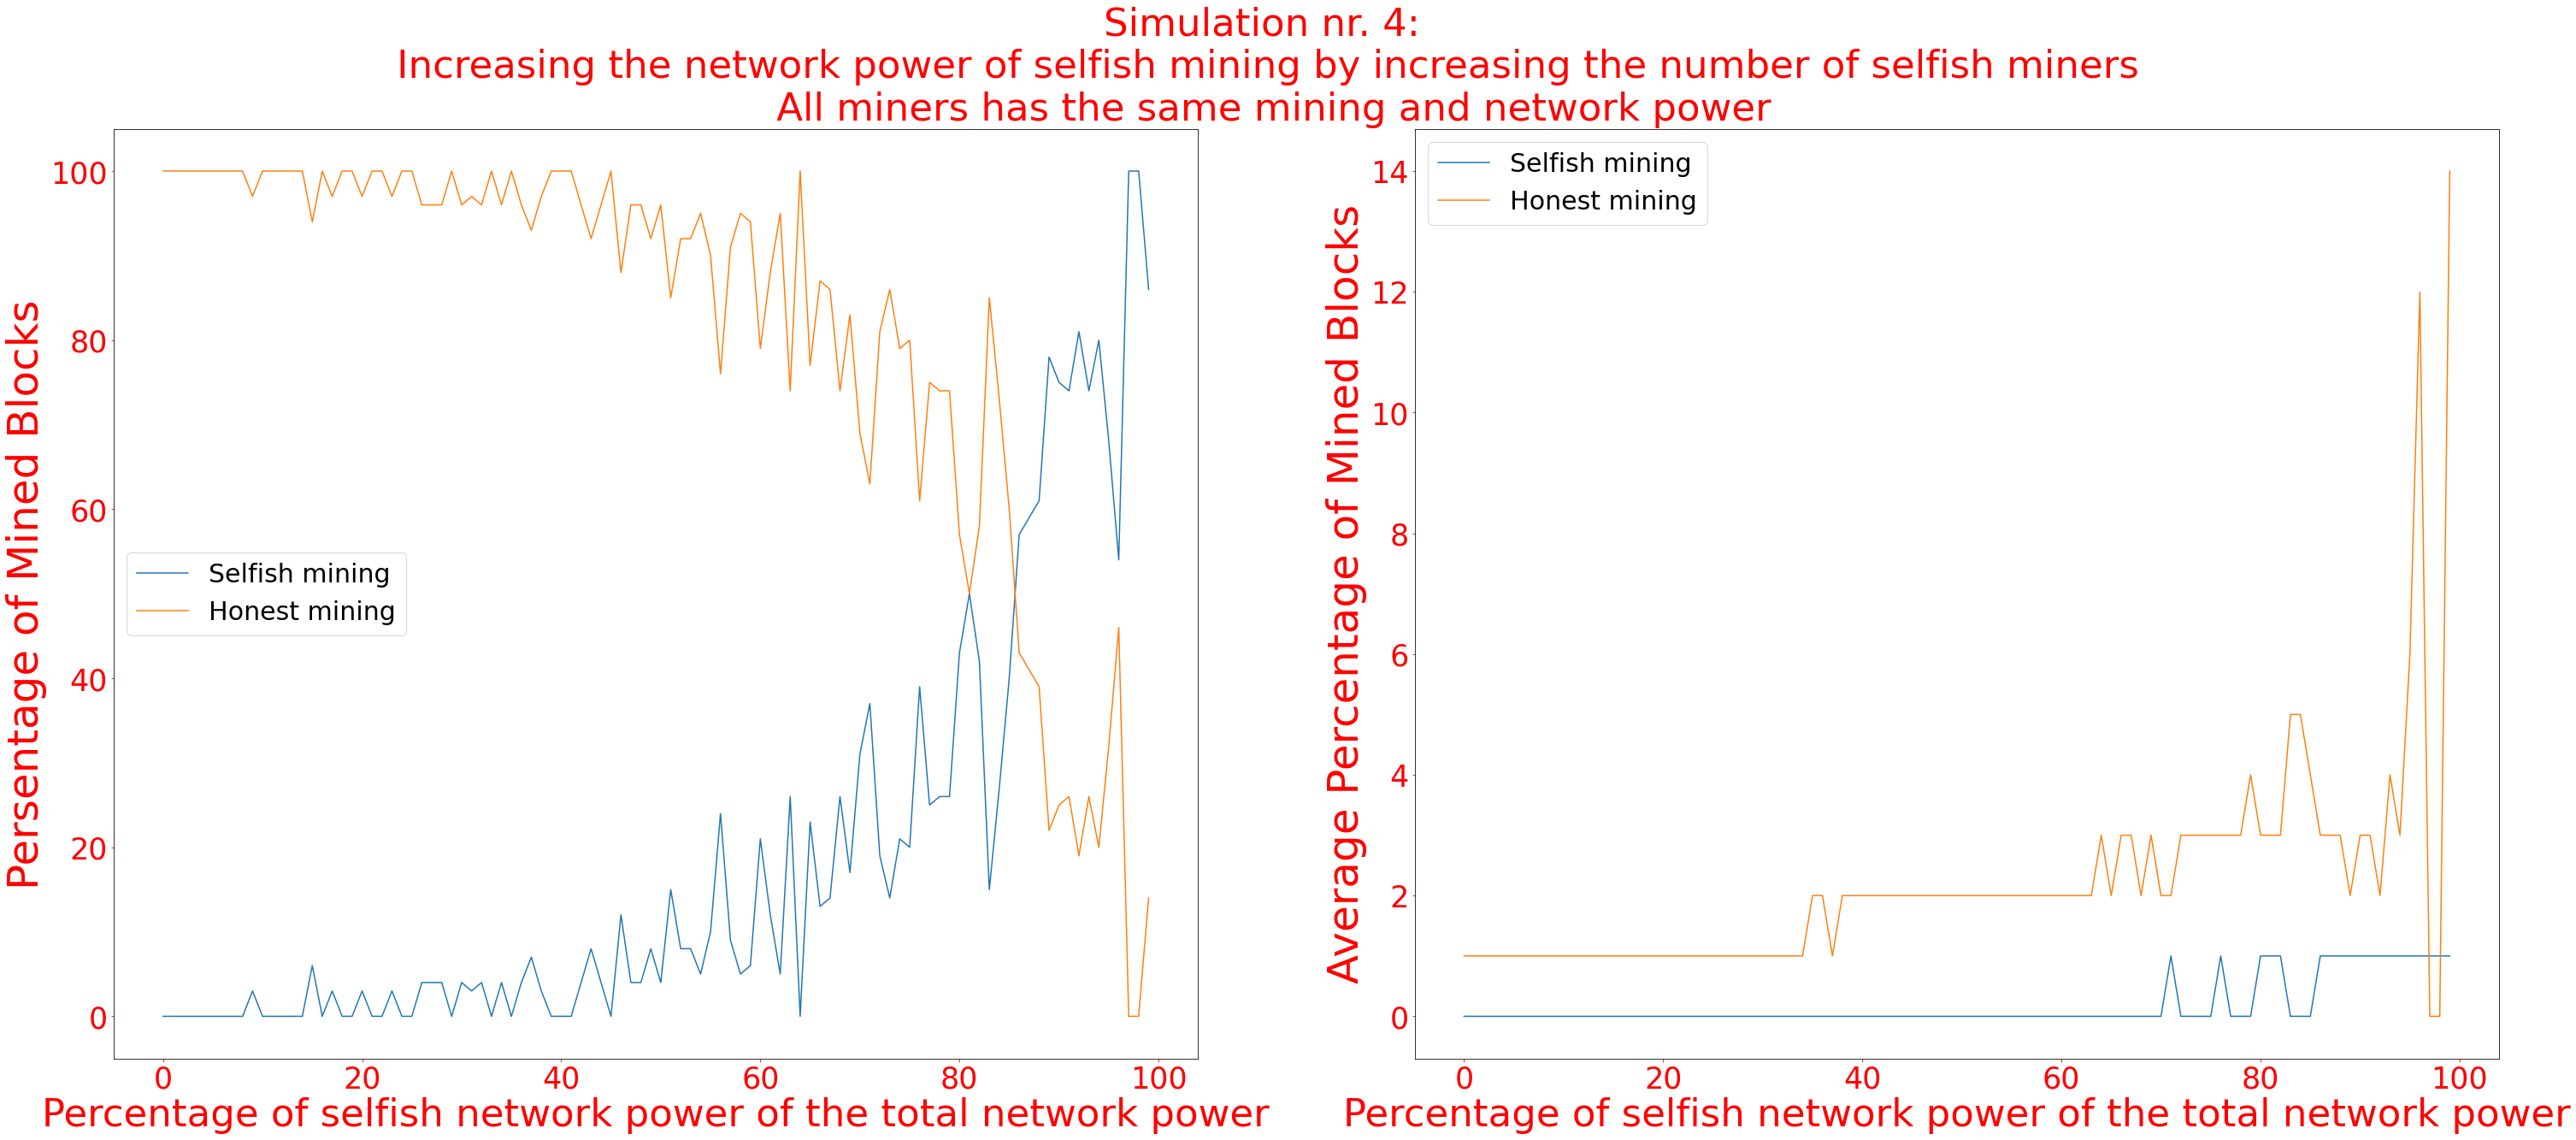

In [11]:
"""
Drawing the results of the previous simulation nr. 4
"""

import matplotlib.pyplot as plt

selfish_power = list(sim_range_selfish)
honest_power = list(sim_range_honest)

fig, axs = plt.subplots(1, 2, figsize=(50,20))
fig.suptitle('Simulation nr. 4: \n Increasing the network power of selfish mining by increasing the number of selfish miners \n All miners has the same mining and network power\n', fontsize=45).set_color('red')  

axs[0].plot(selfish_power, all_total_selfish_profits, label = "Selfish mining")
axs[0].plot(selfish_power, all_total_honest_profits, label = "Honest mining")
axs[0].tick_params(axis='x', colors='red')
axs[0].tick_params(axis='y', colors='red')
axs[0].set_xlabel('Percentage of selfish network power of the total network power', fontsize=45).set_color('red')
axs[0].set_ylabel('Persentage of Mined Blocks', fontsize=50).set_color('red')
axs[0].legend(prop={"size":30})
l = plt.setp(axs[0].get_xticklabels(), fontsize=35)
l = plt.setp(axs[0].get_yticklabels(), fontsize=35)

axs[1].plot(selfish_power, all_average_selfish_profits, label = "Selfish mining")
axs[1].plot(selfish_power, all_average_honest_profits, label = "Honest mining")
axs[1].tick_params(axis='x', colors='red')
axs[1].tick_params(axis='y', colors='red')
axs[1].set_xlabel('Percentage of selfish network power of the total network power', fontsize=45).set_color('red')
axs[1].set_ylabel('Average Percentage of Mined Blocks', fontsize=50).set_color('red')
axs[1].legend(prop={"size":30})
l = plt.setp(axs[1].get_xticklabels(), fontsize=35)
l = plt.setp(axs[1].get_yticklabels(), fontsize=35)

## Analysis and Comments on Simulation Results nr. 4
When we inrease the selfish network power by inreasing the number of selfish miners and decreasing the number of honest miners, we observe the following:

1. Selfish mining is less profitbale under around 80% network power.
2. The competition between selfish and honest mining is high at around 80% to 85%
3. Selfish mining is more profitable when selfish miners have more than 90% of network power together in total.
4. However for an average miner, it is mostly better to be an honest miner since the average profit made by honest miners is most of the time higher than it is for those selfish miners. as the average plot on the right side shows.

### Greedy Heaviest-Observed Subtree: Simulation & Analysis<br>
## Simulation nr. 5: 
In this simulation we aim to study the effect of the GHOST strategy on selfish mining. This simulation has the following setup:

A) Total number of miners 100.

B) Total mining power of 100, each miner has a mining power of 1.

C) Total network power of 100, each miner has a network power of 1.

D) Network power is weighted random, i.e. the higher the network power is for one miner, the better his chances are of replicating his blockchain when a blockchain fork appear.

E) We start the simulation with 100 honest miners and 0 GHOST selfish miners

F) We run the simulation for 60 steps, at each step: 

1. Increasing the number for selfish miners follwoing the GHOST strategy by 1, and
2. Decreasing the number for honest miners by 1.

### GHOST Simulation & Analysis <br>

#### The following redesign steps was added to the previous core classes to implement GHOST mining

A) Adding a heaviestChain() method in the Blockchain class to get the chain with the most blocks in it.

B) Editing the mechanism in the Blockchain class to implement the changes in A)above.

In [12]:
class Blockchain:
    def __init__(self, genesis_data, difficulty, protocol="longest"):
        self.chain = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0
        self.protocol = protocol

    def lastBlock(self):
      if self.protocol == "longest":
        return self.longestChain()
      else:
        return self.heaviestChain(self.chain[0])
    
    def longestChain(self): 
      max = self.chain[0]
      for block in self.chain:
        if block.height > max.height:
          max = block
      return max

    def heaviestChain(self, root):
      if len(root.children) == 0:
        return root
      else:
        max = root.children[0]
        maxChilds = self.numberOfBlocksInSubtree(max)
        for block in root.children:
          tmp = self.numberOfBlocksInSubtree(block)
          if tmp > maxChilds:
            max = block
            maxChilds = tmp
        return self.heaviestChain(max)

    def numberOfBlocksInSubtree(self, block):
      if len(block.children) == 0:
        return 1
      else:
        sum = 0
        for b in block.children:
          sum += self.numberOfBlocksInSubtree(b)
        return 1 + sum

    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size +=1
        
    def checkMiner(self, miner):
        last = self.longestChain()
        count = 0
        while last!=None:
            if last.creator == miner:
                count += 1
            last = last.previous
        return count

In [13]:
"""
The code below runs simulation nr. 5, se table at the head of this notebook for summary details
"""
output = True
all_total_selfish_profits = []
all_total_honest_profits = []
all_average_selfish_profits = []
all_average_honest_profits = []
sim_range_selfish = range(0, 100, 1)
sim_range_honest = range(100, 0, -1)

print("Simulating varying network power between miners with")
print("-> equal mining power for each miner")
print("-> and varying the number of honest and selfish miners at each simulation")
print("")

for i in sim_range_selfish:
    num_of_selfish_miners = i
    num_of_honest_miners = 100-i
    
    total_mining_power = 100
    honest_mining_power_share = round(num_of_honest_miners/total_mining_power, 2)
    selfish_mining_power_share = round(num_of_selfish_miners/total_mining_power, 2)
    honest_mining_power = round(total_mining_power * honest_mining_power_share)
    selfish_mining_power = round(total_mining_power * selfish_mining_power_share)
    
    total_network_power = 100
    honest_network_power_share = round(num_of_honest_miners/total_network_power, 2)
    selfish_network_power_share = round(num_of_selfish_miners/total_network_power, 2)
    honest_network_power = round(total_network_power * honest_network_power_share)
    selfish_network_power = round(total_network_power * selfish_network_power_share)

    bc = Blockchain("0" , 7)
    
    honest_miners = make_miners("honest", honest_network_power, num_of_honest_miners, honest_mining_power, bc)
    
    selfish_miners = make_miners("selfish", selfish_network_power, num_of_selfish_miners, selfish_mining_power, bc)
        
    if output:
        print(f"Running simulation with:")
        print(f"-> {len(honest_miners)} honest minors having {honest_network_power}% of total networking power and {honest_mining_power}% of total mining power")
        print(f"-> {len(selfish_miners)} selfish minors having {selfish_network_power}% of total networking power and {selfish_mining_power}% of total mining power")
        print("...")
        
    selfish_profits, honest_profits = simulate_selfish_mining(bc, honest_miners, selfish_miners)
    sum_selfish_profit = round(sum(selfish_profits), 2)
    sum_honest_profit = round(sum(honest_profits), 2)
    all_total_selfish_profits.append(sum_selfish_profit*100)
    all_total_honest_profits.append(sum_honest_profit*100)
    
    if len(selfish_profits) != 0:
        average_selfish_profit = round(sum(selfish_profits) / len(selfish_profits), 2)
    else:
        average_selfish_profit = 0
    all_average_selfish_profits.append(average_selfish_profit*100)  
    
    if len(honest_profits) != 0:
        average_honest_profit = round(sum(honest_profits) / len(honest_profits), 2)
    else:
        average_honest_profit = 0
    all_average_honest_profits.append(average_honest_profit*100)
    
    if output:
        print(f"Total Percentage Sum of Honest Profit: {sum_honest_profit}, Average: {average_honest_profit}")
        print(f"Total Percentage Sum of Selfish Profit: {sum_selfish_profit}, Average: {average_selfish_profit}")
        print(f"Total Percentage Sum of Profit (Honest+Selfish): {round(sum_selfish_profit+sum_honest_profit)}")
        print()

Simulating varying network power between miners with
-> equal mining power for each miner
-> and varying the number of honest and selfish miners at each simulation

Running simulation with:
-> 100 honest minors having 100% of total networking power and 100% of total mining power
-> 0 selfish minors having 0% of total networking power and 0% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0, Average: 0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 99 honest minors having 99% of total networking power and 99% of total mining power
-> 1 selfish minors having 1% of total networking power and 1% of total mining power
...
Total Percentage Sum of Honest Profit: 0.97, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.03, Average: 0.03
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 98 honest minors having 98% of total networking power and 98% of to

Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 77 honest minors having 77% of total networking power and 77% of total mining power
-> 23 selfish minors having 23% of total networking power and 23% of total mining power
...
Total Percentage Sum of Honest Profit: 0.93, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.07, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 76 honest minors having 76% of total networking power and 76% of total mining power
-> 24 selfish minors having 24% of total networking power and 24% of total mining power
...
Total Percentage Sum of Honest Profit: 1.0, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.0, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 75 honest minors having 75% of total networking power and 

Total Percentage Sum of Honest Profit: 0.86, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.14, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 55 honest minors having 55% of total networking power and 55% of total mining power
-> 45 selfish minors having 45% of total networking power and 45% of total mining power
...
Total Percentage Sum of Honest Profit: 0.96, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.04, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 54 honest minors having 54% of total networking power and 54% of total mining power
-> 46 selfish minors having 46% of total networking power and 46% of total mining power
...
Total Percentage Sum of Honest Profit: 0.95, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.05, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 53 honest minors having 53% of total networking power 

Total Percentage Sum of Honest Profit: 0.82, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.18, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 33 honest minors having 33% of total networking power and 33% of total mining power
-> 67 selfish minors having 67% of total networking power and 67% of total mining power
...
Total Percentage Sum of Honest Profit: 0.7, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.3, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 32 honest minors having 32% of total networking power and 32% of total mining power
-> 68 selfish minors having 68% of total networking power and 68% of total mining power
...
Total Percentage Sum of Honest Profit: 0.94, Average: 0.03
Total Percentage Sum of Selfish Profit: 0.06, Average: 0.0
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 31 honest minors having 31% of total networking power an

Total Percentage Sum of Honest Profit: 0.46, Average: 0.04
Total Percentage Sum of Selfish Profit: 0.54, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 11 honest minors having 11% of total networking power and 11% of total mining power
-> 89 selfish minors having 89% of total networking power and 89% of total mining power
...
Total Percentage Sum of Honest Profit: 0.24, Average: 0.02
Total Percentage Sum of Selfish Profit: 0.76, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 10 honest minors having 10% of total networking power and 10% of total mining power
-> 90 selfish minors having 90% of total networking power and 90% of total mining power
...
Total Percentage Sum of Honest Profit: 0.11, Average: 0.01
Total Percentage Sum of Selfish Profit: 0.89, Average: 0.01
Total Percentage Sum of Profit (Honest+Selfish): 1

Running simulation with:
-> 9 honest minors having 9% of total networking power

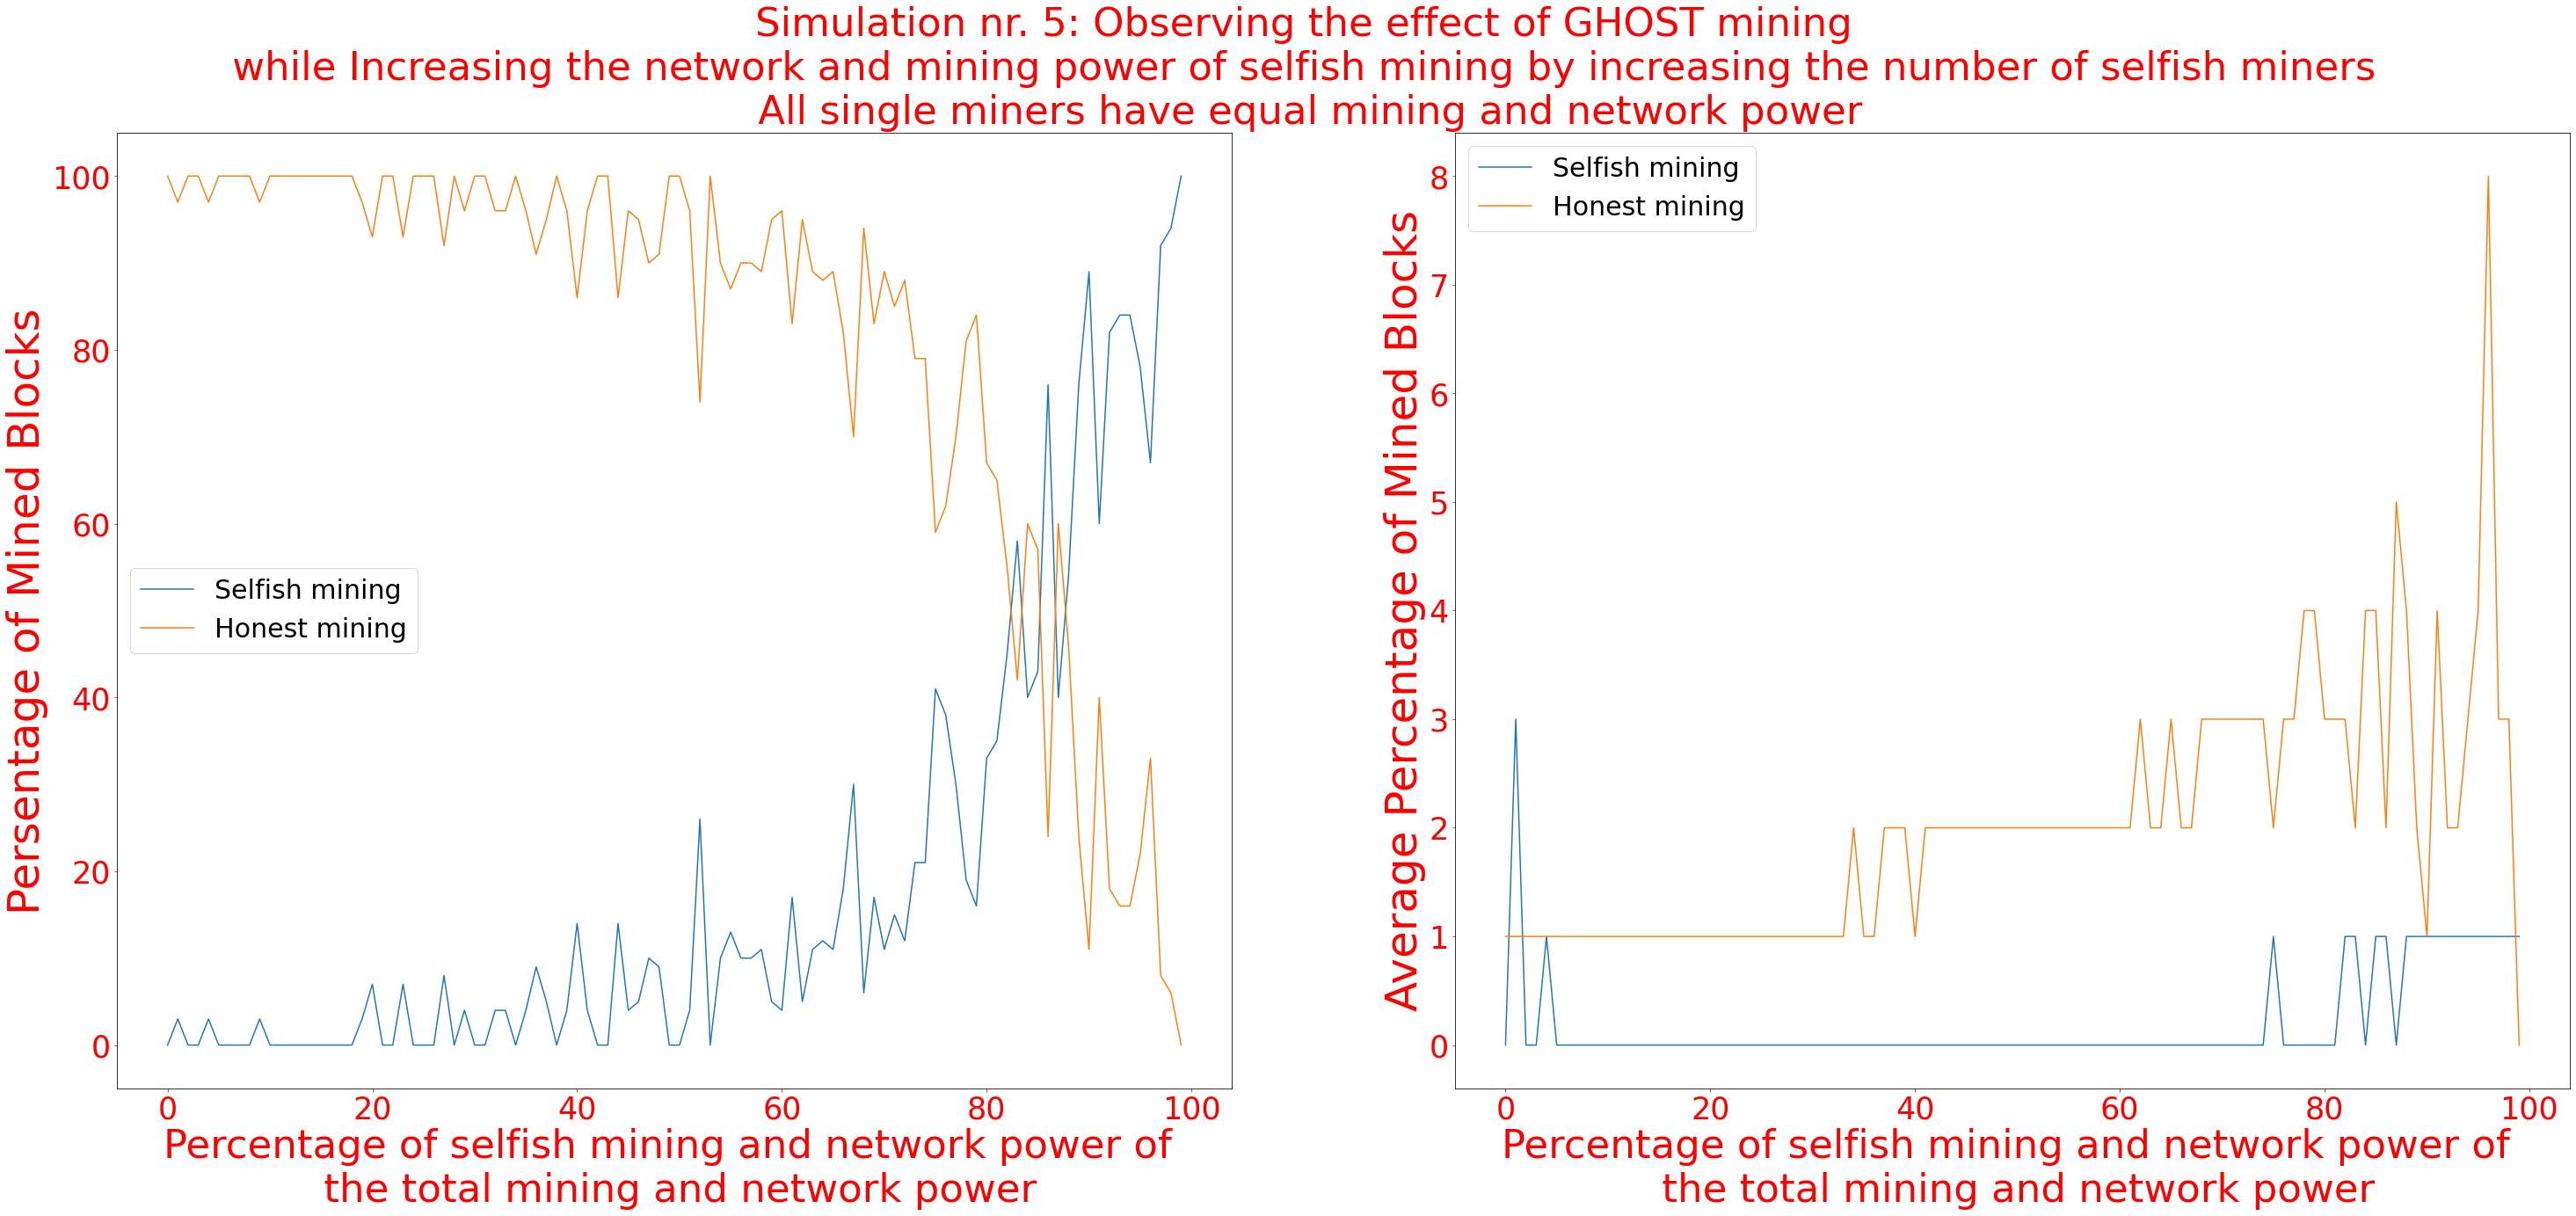

In [14]:
"""
Drawing the results of the previous simulation nr. 5
"""

import matplotlib.pyplot as plt

selfish_power = list(sim_range_selfish)
honest_power = list(sim_range_honest)

fig, axs = plt.subplots(1, 2, figsize=(50,20))
fig.suptitle('Simulation nr. 5: Observing the effect of GHOST mining\n while Increasing the network and mining power of selfish mining by increasing the number of selfish miners \n All single miners have equal mining and network power\n', fontsize=45).set_color('red')  

axs[0].plot(selfish_power, all_total_selfish_profits, label = "Selfish mining")
axs[0].plot(selfish_power, all_total_honest_profits, label = "Honest mining")
axs[0].tick_params(axis='x', colors='red')
axs[0].tick_params(axis='y', colors='red')
axs[0].set_xlabel('Percentage of selfish mining and network power of \n the total mining and network power', fontsize=45).set_color('red')
axs[0].set_ylabel('Persentage of Mined Blocks', fontsize=50).set_color('red')
axs[0].legend(prop={"size":30})
l = plt.setp(axs[0].get_xticklabels(), fontsize=35)
l = plt.setp(axs[0].get_yticklabels(), fontsize=35)

axs[1].plot(selfish_power, all_average_selfish_profits, label = "Selfish mining")
axs[1].plot(selfish_power, all_average_honest_profits, label = "Honest mining")
axs[1].tick_params(axis='x', colors='red')
axs[1].tick_params(axis='y', colors='red')
axs[1].set_xlabel('Percentage of selfish mining and network power of \n the total mining and network power', fontsize=45).set_color('red')
axs[1].set_ylabel('Average Percentage of Mined Blocks', fontsize=50).set_color('red')
axs[1].legend(prop={"size":30})
l = plt.setp(axs[1].get_xticklabels(), fontsize=35)
l = plt.setp(axs[1].get_yticklabels(), fontsize=35)

## Analysis and Comments on Simulation Results nr. 5
When we observe the effect of the GHOST mining while inreasing the selfish mining and network power by increasing the number of GHOST selfish miners and decreasing the number of honest miners, we notice the following:
1. Selfish miners following the GHOST strategy have to get hold on more than 80% of both network and mining power to be start making more profit then honest miners.
2. On average, single honest miners makes more profit than their counter GHOST selfish miners, as shown in the right plot above.